# Linear model for the minimum-variance control

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from HarrisWolpert import MinimumVarianceControl, control_learning
m = MinimumVarianceControl(dt = 0.001, n_iter = 50000,record_each = 2500,eta=0.0003, v=20)
u,record=control_learning(dt = 0.001, n_iter = 50000, record_each = 2500,eta=0.0003, v=20)

In [15]:
from PlotFunctions import plot_signal, plot_position, plot_velocity, plot_variance

In [12]:
u

array([ 0.31942008,  0.31918736,  0.31892862,  0.31864095,  0.31832108,
        0.31796539,  0.31756984,  0.31712989,  0.31664054,  0.31609615,
        0.31549046,  0.31481646,  0.31406634,  0.31323133,  0.31230164,
        0.31126631,  0.31011304,  0.30882805,  0.30739584,  0.30579902,
        0.30401799,  0.30203067,  0.29981215,  0.29733428,  0.29456517,
        0.29146866,  0.28800348,  0.28412321,  0.27977427,  0.27489556,
        0.26941702,  0.26325805,  0.2563257 ,  0.24851244,  0.23969349,
        0.22972357,  0.21843302,  0.20562298,  0.19105963,  0.17446721,
        0.15551941,  0.13382914,  0.10893621,  0.08029268,  0.04724591,
        0.00901956, -0.03530672, -0.08681645, -0.1467702 , -0.21660583,
       -0.12817663, -0.07075585, -0.03418402, -0.01137169,  0.00253174,
        0.01078165,  0.01552101,  0.01813277,  0.0194909 ,  0.02013531,
        0.02039111,  0.02044837,  0.02041415,  0.02034594,  0.02027249,
        0.02020656,  0.02015249,  0.02011047,  0.02007897,  0.02

In [13]:
record

,position,signal,variance,velocity
0,"[0.0, 0.0, 0.04, 0.116, 0.2244, 0.36196, 0.525...","[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...","[0.0, 0.0, 1.6e-05, 7.376e-05, 0.0001912656, 0...","[0.0, 40.0, 76.0, 108.4, 137.56, 163.804, 187...."
2500,"[0.0, 0.0, 0.0369380860738, 0.107108479582, 0....","[0.369380860738, 0.369261160416, 0.36912812166...","[0.0, 0.0, 1.36442220279e-05, 6.289102198e-05,...","[0.0, 36.9380860738, 70.170393508, 100.0661663..."
5000,"[0.0, 0.0, 0.0343979470699, 0.0997363631004, 0...","[0.343979470699, 0.343802636677, 0.34360607754...","[0.0, 0.0, 1.18321876262e-05, 5.45342226292e-0...","[0.0, 34.3979470699, 65.3384160305, 93.1651821..."
7500,"[0.0, 0.0, 0.0331583046029, 0.0961385312144, 0...","[0.331583046029, 0.331377524689, 0.33114906212...","[0.0, 0.0, 1.09947316414e-05, 5.06720876122e-0...","[0.0, 33.1583046029, 62.9802266115, 89.7971101..."
10000,"[0.0, 0.0, 0.0325472648112, 0.0943651070965, 0...","[0.325472648112, 0.325253039553, 0.32500890580...","[0.0, 0.0, 1.05932444669e-05, 4.88205664993e-0...","[0.0, 32.5472648112, 61.8178422853, 88.1369486..."
12500,"[0.0, 0.0, 0.0322443217302, 0.0934858884738, 0...","[0.322443217302, 0.322216771865, 0.32196503020...","[0.0, 0.0, 1.03969628384e-05, 4.79154006536e-0...","[0.0, 32.2443217302, 61.2415667436, 87.3139130..."
15000,"[0.0, 0.0, 0.0320934982931, 0.0930481712915, 0...","[0.320934982931, 0.320705245346, 0.32044983914...","[0.0, 0.0, 1.02999263269e-05, 4.74679194793e-0...","[0.0, 32.0934982931, 60.9546729984, 86.9041896..."
17500,"[0.0, 0.0, 0.0320181489687, 0.0928295007097, 0...","[0.320181489687, 0.319950176692, 0.31969301632...","[0.0, 0.0, 1.02516186338e-05, 4.72451548246e-0...","[0.0, 32.0181489687, 60.811351741, 86.69951819..."
20000,"[0.0, 0.0, 0.0319803878848, 0.0927199186001, 0...","[0.319803878848, 0.31957181619, 0.319313820836...","[0.0, 0.0, 1.02274520926e-05, 4.71337166247e-0...","[0.0, 31.9803878848, 60.7395307153, 86.5969597..."
22500,"[0.0, 0.0, 0.0319614078985, 0.0926648411651, 0...","[0.319614078985, 0.319381661578, 0.31912327096...","[0.0, 0.0, 1.02153159486e-05, 4.70777551496e-0...","[0.0, 31.9614078985, 60.7034332665, 86.5454170..."


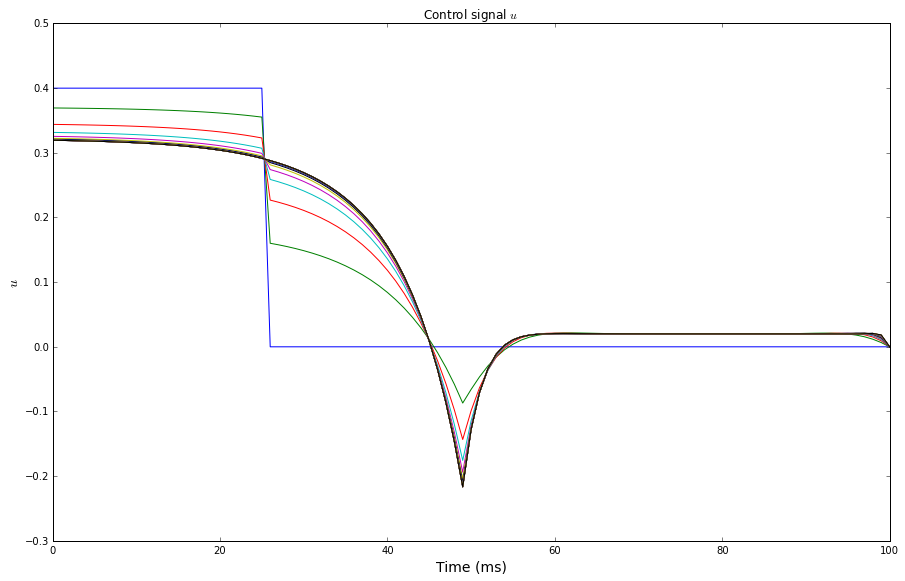

In [16]:
plot_signal(record.signal, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt)

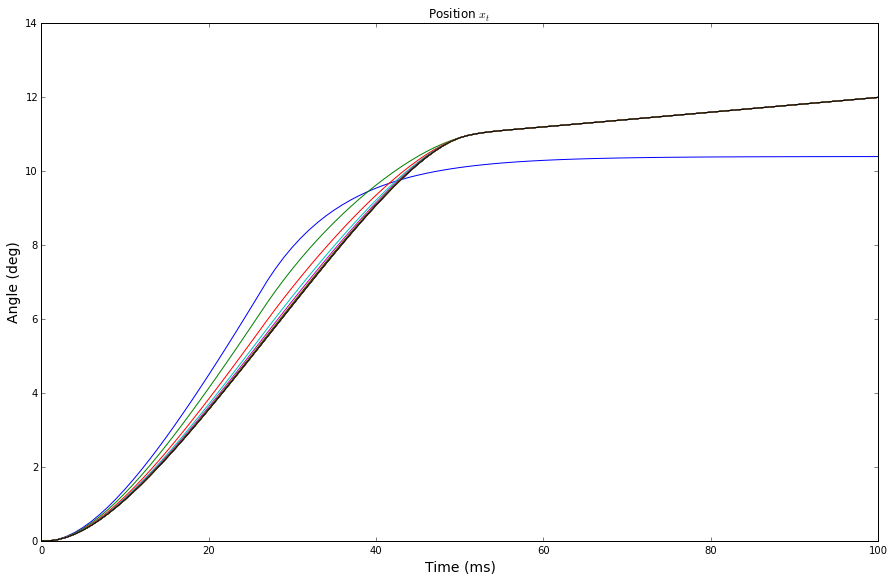

In [18]:
plot_position(record.position, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt)

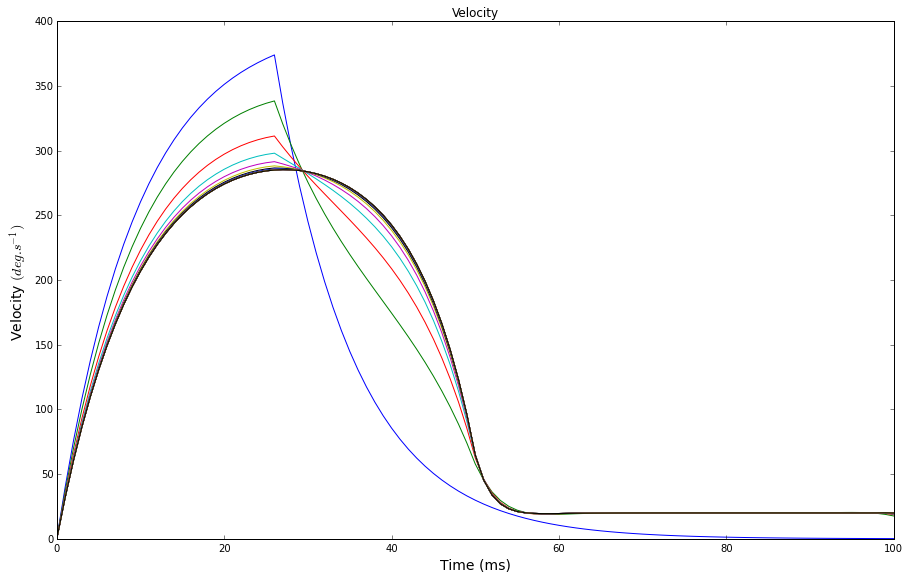

In [19]:
plot_velocity(record.velocity, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt)

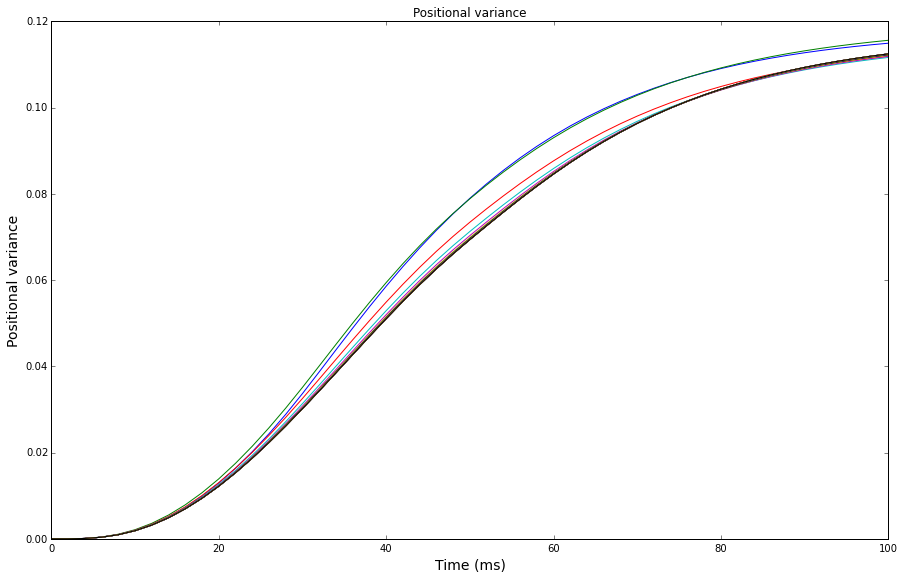

In [87]:
plot_variance(record.variance, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt)

In [46]:
positionT = np.zeros(m.n_iter//m.record_each)

for i in m.record_each*np.arange(m.n_iter//m.record_each):
    positionT[i//m.record_each] = record.position[i][m.t_T//m.dt]

/home/baptiste/.local/lib/python3.4/site-packages/ipykernel_launcher.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  after removing the cwd from sys.path.


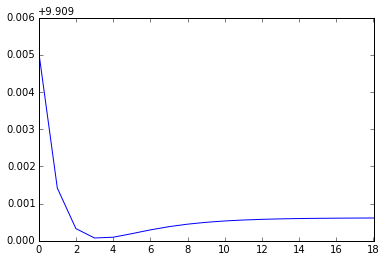

In [47]:
plt.plot(positionT[1:m.n_iter//m.record_each])